In [1026]:
import numpy as np
from ssa import *
from lds import *
import matplotlib.pyplot as plt

In [1027]:
eps = 0.01
target = -0.1

In [1028]:
n=32

In [1029]:
A = np.random.normal(0, 1.0, size=(n, n))

In [1030]:
fAs(A, 0.0)[0:2]

(81.94324656251021, -424.94308995453866)

In [1031]:
s_absc = np.max([np.real(eig) for eig in np.linalg.eigvals(A)])
s_absc

5.207287980954627

In [1032]:
a_e, del_s_a_e = ssa(A, eps, start_at_absc = True, method="newton")

In [1033]:
print(f"smoothed spectral abscissa: {a_e}")
print(f"spectral_abscissa: {s_absc}")

smoothed spectral abscissa: 5.226904627305282
spectral_abscissa: 5.207287980954627


In [ ]:
orig_A = np.copy(A)
B, s_abscs, ss_abscs = optimize_ssa(A, eps, target, step_size=0.001, iters=50, show_prog=True)

TypeError: optimize_ssa() got an unexpected keyword argument 'method'

In [ ]:
ss_abscs[-1]

-0.0999999999998051

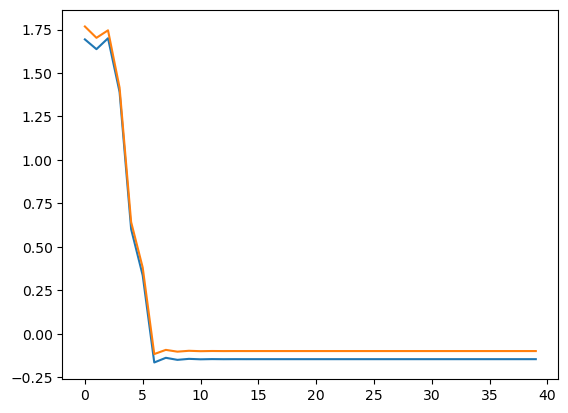

In [ ]:
plt.plot(s_abscs[10:50])
plt.plot(ss_abscs[10:50])

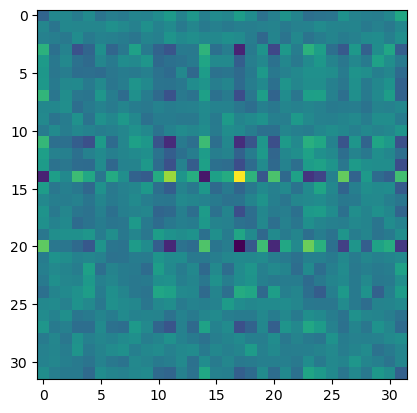

In [ ]:
plt.imshow(B)

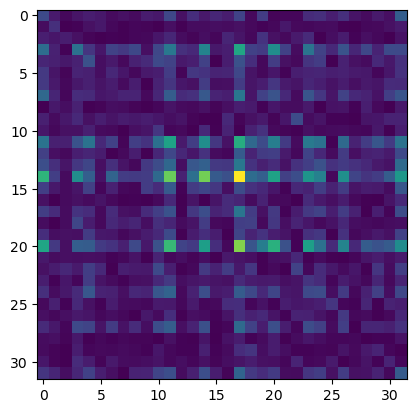

In [ ]:
plt.imshow(np.abs(orig_A - B))

In [ ]:
def graph_fAs(pr=False):
    xs = np.linspace(a_e - 2.0, a_e + 2.0, num=50)
    ys = np.array([fAs(A, x, False)[0] for x in xs])
    if pr: print(ys)

    plt.plot(xs, ys)
    plt.vlines([s_absc], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="BLACK", linestyles="dashed", label="abscissa")
    plt.vlines([a_e], ymin=np.min(ys) - 10.0, ymax=np.max(ys) + 10.0, colors="RED", linestyles="dashed", label="a_e")
    plt.show()

In [ ]:
C = np.copy(B)

In [ ]:
C = mutate(C, eps, target, step_size=0.01)
ssa(C, eps)[0]

-0.41840742615934634

In [ ]:
x_0 = np.zeros(shape=(n,))
x_0[0] = 1.0

In [ ]:
B_xs = lds(B, x_0, iters=500, dt=0.003)
C_xs = lds(C, x_0, iters=500, dt=0.003)

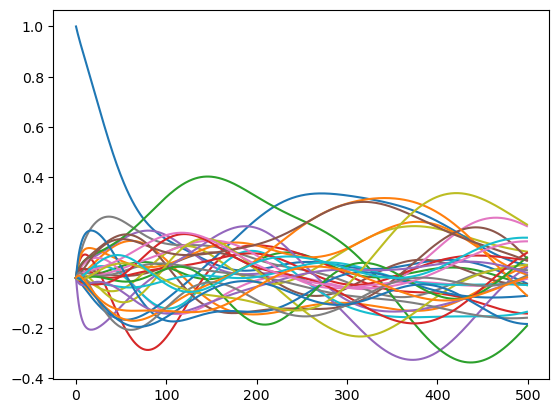

In [ ]:
plt.plot(B_xs)
plt.show()

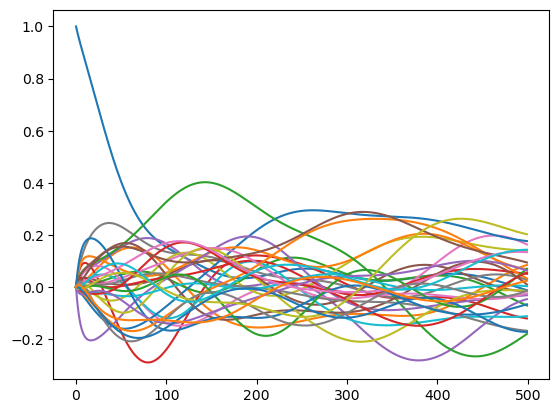

In [ ]:
plt.plot(C_xs)
plt.show()

0.1060491452647554
0.6877635781248436


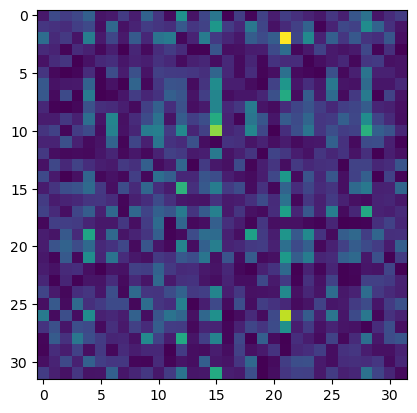

In [ ]:
print(np.max(np.abs(C-B)))
print(np.sqrt(np.sum(np.power(C - B, 2.0))))
plt.imshow(np.abs(C - B))

(array([  3.,   8.,  32., 213., 602., 141.,  18.,   5.,   1.,   1.]),
 array([-17.9645182 , -13.9429236 ,  -9.921329  ,  -5.8997344 ,
         -1.87813979,   2.14345481,   6.16504941,  10.18664401,
         14.20823861,  18.22983322,  22.25142782]),
 <BarContainer object of 10 artists>)

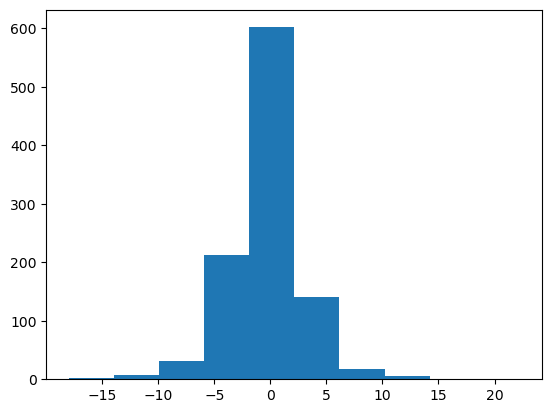

In [ ]:
plt.hist(np.ravel(C))

In [ ]:
D = np.copy(B)
xs, tangent_thetas, abscs, s_abscs, s_norms, F_norms = linear_hebbian_stable(D, x_0, eps, target, iters=500, beta=0.0, dA=0.02)

DID NOT CONVERGE
DID NOT CONVERGE
DID NOT CONVERGE


LinAlgError: Array must not contain infs or NaNs

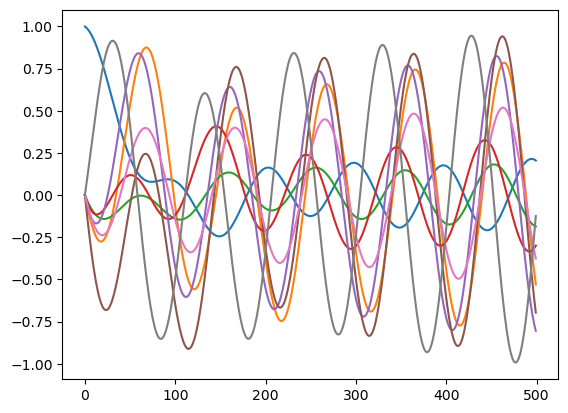

In [ ]:
plt.plot(xs)
plt.show()

In [ ]:
D_xs = lds(D, x_0, iters=500, dt=0.01)

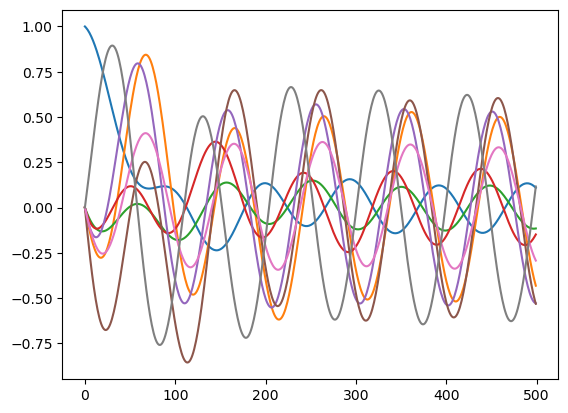

In [ ]:
plt.plot(D_xs)
plt.show()

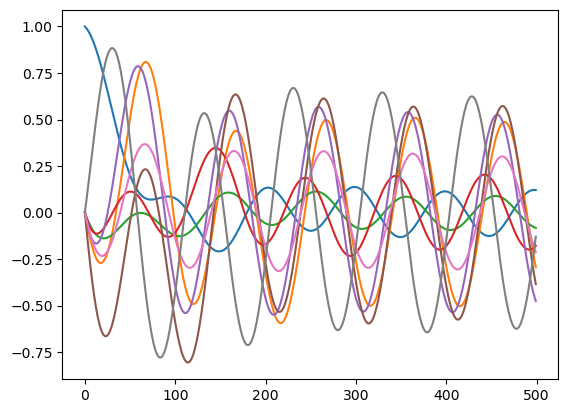

In [ ]:
plt.plot(B_xs)
plt.show()

0.1629583152346119
0.41246924138308005


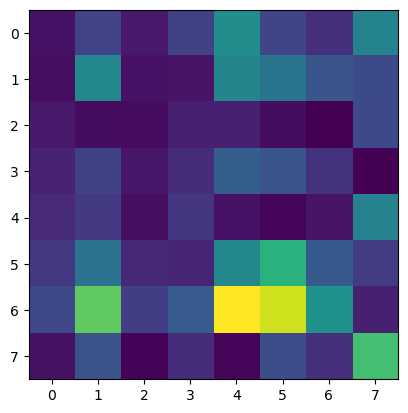

In [ ]:
print(np.max(np.abs(D-B)))
print(np.sqrt(np.sum(np.power(D - B, 2.0))))
plt.imshow(np.abs(D - B))